# Function Transformation

- Function Transformation is a data preprocessing technique where we apply mathematical functions to transform feature values.
- Function Transformation is also used to change the patern of the data using various mathematical functions in function tranfromtation.
- It is also used to convert the abnormaly distributed data to normal distribution.
##### It's especially useful to:
- Handle skewed distributions
- Stabilize variance
- Make data more normal (bell-shaped)
- Improve model performance

### Common Types Of Transformer Functions
| Transformation  | Formula            | Use-case                            |
| --------------- | ------------------ | ----------------------------------- |
| **Log**         | `log(x)`           | Right-skewed data                   |
| **Square Root** | `sqrt(x)`          | Moderate right skew                 |
| **Cube Root**   | `x^(1/3)`          | Heavy skew, can handle negatives    |
| **Exponential** | `exp(x)`           | Left-skewed data                    |
| **Reciprocal**  | `1/x`              | Strong right skew                   |
| **Power**       | `x^2, x^3`         | Scale smaller values up             |
| **Box-Cox**     | `T(x, λ)`          | Makes data normal (λ is auto-tuned) |
| **Yeo-Johnson** | Variant of Box-Cox | Handles 0 and negative values       |


### When To Use Which Transformation
| Data Type                      | Recommended Transformations    |
| ------------------------------ | ------------------------------ |
| **Right-skewed**               | `log(x)`, `sqrt(x)`, `box-cox` |
| **Left-skewed**                | `exp(x)`, `square(x)`          |
| **Negative + Positive values** | `yeo-johnson`, `cube-root`     |
| **Nonlinear relationships**    | `polynomial`, `log(x)`         |
| **Variance not constant**      | `log`, `box-cox`               |


##### Example From ChatGPT Using Python

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Example Skewed Dataset
df = pd.DataFrame({'Income': [25000, 30000, 40000, 50000, 100000]})
df

,Income
0,25000
1,30000
2,40000
3,50000
4,100000


- Here, we have to handle outliers before going for the Function Transformation

In [9]:
# Log transformation
df['log_income'] = np.log1p(df['Income']) # Always use log1p() instead of log() for 0-safe transform: log1p(x) = log(x + 1)
df

,Income,log_income
0,25000,10.126671
1,30000,10.308986
2,40000,10.596660
3,50000,10.819798
4,100000,11.512935


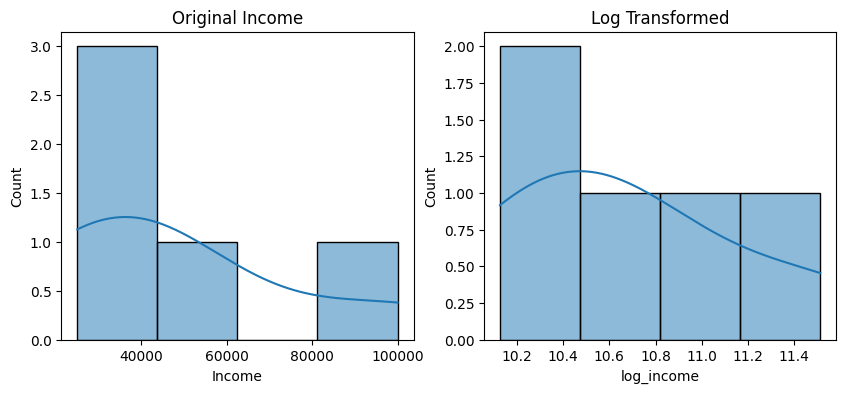

In [7]:
# Plot original vs transformed
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['Income'], kde=True, ax=ax[0]).set_title("Original Income")
sns.histplot(df['log_income'], kde=True, ax=ax[1]).set_title("Log Transformed")
plt.show()

##### Using The Scikit_Learn Pipelines For Transformation

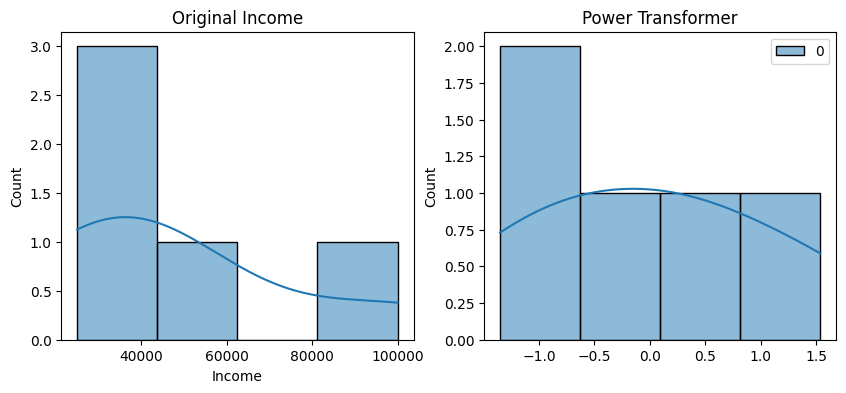

In [5]:
# Apply PowerTransformer (Box-Cox or Yeo-Johnson)
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # or 'box-cox'
X_transformed = pt.fit_transform(df[['Income']])

# Plot original vs transformed
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['Income'], kde=True, ax=ax[0]).set_title("Original Income")
sns.histplot(X_transformed, kde=True).set_title("Power Transformer")
plt.show()

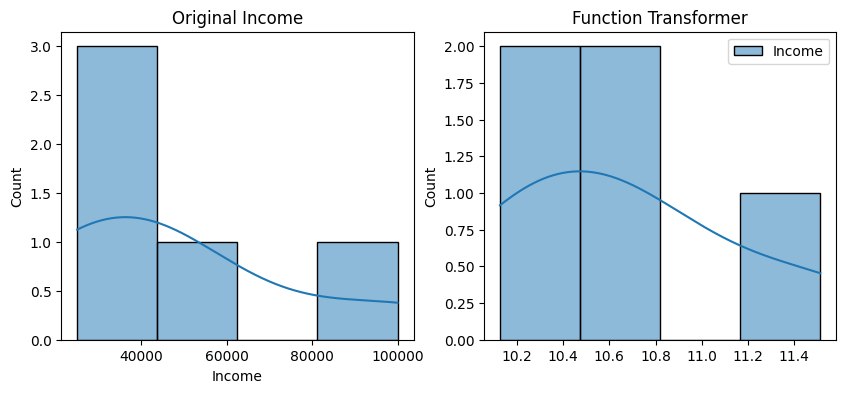

In [ ]:
# Apply FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Log1p transformation
log_transformer = FunctionTransformer(np.log1p)  # Here, Log fucntion is used to create function transformer with log compatiablity
X_log = log_transformer.fit_transform(df[['Income']])

# Plot original vs transformed
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['Income'], kde=True, ax=ax[0]).set_title("Original Income")
sns.histplot(X_log, kde=True).set_title("Function Transformer")
plt.show()

# Function Transformer In Detail
- The FunctionTransformer in Scikit-learn is a flexible tool that allows you to wrap any function and apply it as a transformer (preprocessing step) inside a pipeline.

### 📌 Syntax
- from sklearn.preprocessing import FunctionTransformer

- FunctionTransformer(func=None, inverse_func=None, validate=False, accept_sparse=False, feature_names_out=None, kw_args=None, inv_kw_args=None)

##### Key Paramters
| Parameter      | Description                                                              |
| -------------- | ------------------------------------------------------------------------ |
| `func`         | The function to apply on input `X` (e.g. `np.log1p`, `lambda x: x + 10`) |
| `inverse_func` | (Optional) Function to reverse the transformation                        |
| `validate`     | If `True`, input will be converted to NumPy array and checked            |
| `kw_args`      | Dict of extra args for `func`                                            |
| `inv_kw_args`  | Extra args for `inverse_func`                                            |



#####  Basic Example – Log Transformation

[[0.69314718]
 [1.09861229]
 [2.39789527]]


Text(0.5, 1.0, 'Function Transformer')

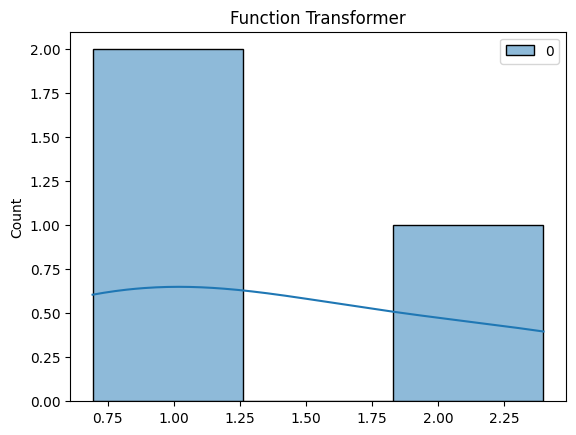

In [16]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# Create the transformer
log_transformer = FunctionTransformer(np.log1p)

# Example data
X = np.array([[1], [2], [10]])

# Transform
X_log = log_transformer.fit_transform(X)

print(X_log)
sns.histplot(X_log, kde=True).set_title("Function Transformer")

- If the outliers in data are important and we can not remove the outliers then use this function tranformer fuction to format the data.